In [95]:
import matplotlib.pyplot as plt
import csv
import numpy as np

6000


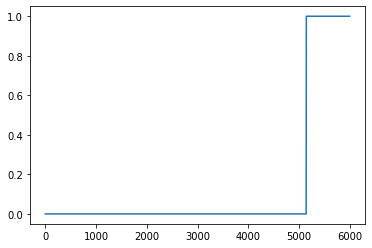

In [118]:
dataset_train = list()

labels = list()

with open('train_job/train.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):

        if i == 0:
            pass
        else:
            dataset_train.append(line)
            labels.append(int(line[2]))
#             if i >= 5:
#                 pass
#             else:
#                 print(line)
    
    print(i)

dataset_train[:10]

plt.figure()
plt.plot(sorted(labels))
plt.show()



['320722549d1751cf3f247855f937b982', 'd38901788c533e8286cb6400b40b386d']
['e744f91c29ec99f0e662c9177946c627', '3948ead63a9f2944218de038d8934305']
['e744f91c29ec99f0e662c9177946c627', '0e095e054ee94774d6a496099eb1cf6a']
['e820a45f1dfc7b95282d10b6087e11c0', '7d771e0e8f3633ab54856925ecdefc5d']
['e820a45f1dfc7b95282d10b6087e11c0', '6c8dba7d0df1c4a79dd07646be9a26c8']
len of train job flie: 3477
len of train jobs: 733


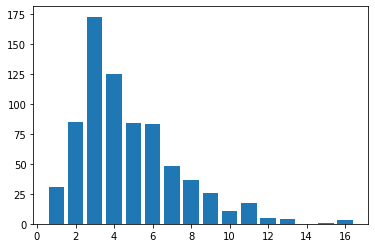

In [113]:
job_dict = dict()

with open('train_job/job_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i == 0:
            pass
        else:
            try:
                job_dict[line[0]].append(line[1])
            except KeyError:
                job_dict[line[0]] = [line[1]]
            if i <= 5:
                print(line)
    
print(f'len of train job flie: {i}')
print(f'len of train jobs: {len(job_dict)}')


nums = list()

for key in job_dict:
    nums.append(len(job_dict[key]))

plt.figure()
plt.hist(nums, bins=16, align='left', rwidth=0.8)
plt.show()


In [72]:
company_set = set()
jobs_set = set()
company_size_set = set()


with open('train_job/job_companies.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i == 0:
            print(line)
            pass
        else:
            company_set.add(line[0])
            jobs_set.add(line[1])
            company_size_set.add(line[2])
    
    print(i)
    
print(company_size_set)

print(len(company_set))

['companyID', 'jobID', 'companySize']
733
{'', '51-100', '1-10', '201-500', '11-50', '501-1000', '101-200', '1000 이상'}
276


In [94]:
user_dict = dict()

with open('train_job/user_tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i != 0:
    
            try:
                user_dict[line[0]].append(line[1])
            except KeyError:
                user_dict[line[0]] = [line[1]]
        if i <= 10:
            print(line)

    print(i)

print()
    
print(len(user_dict))
    
for i, key in enumerate(user_dict):
    if i == 2:
        break
    print(f'{key} => {len(user_dict[key])}')
  
print()

sum_of_len = 0
for i, key in enumerate(user_dict):
    sum_of_len += len(user_dict[key])
    
print(sum_of_len)

['userID', 'tagID']
['e576423831e043f7928d9ac113abbe6f', '82c2559140b95ccda9c6ca4a8b981f1e']
['e576423831e043f7928d9ac113abbe6f', '2ba8698b79439589fdd2b0f7218d8b07']
['e576423831e043f7928d9ac113abbe6f', '351b33587c5fdd93bd42ef7ac9995a28']
['e576423831e043f7928d9ac113abbe6f', '81e5f81db77c596492e6f1a5a792ed53']
['e576423831e043f7928d9ac113abbe6f', '0e095e054ee94774d6a496099eb1cf6a']
['e576423831e043f7928d9ac113abbe6f', 'e4873aa9a05cc5ed839561d121516766']
['3532ee676d13916210e903ff4d85c04f', 'aace49c7d80767cffec0e513ae886df0']
['3532ee676d13916210e903ff4d85c04f', 'f91e24dfe80012e2a7984afa4480a6d6']
['3203e06c1efc6fdb23016650d1d1888c', '884d79963bd8bc0ae9b13a1aa71add73']
['3203e06c1efc6fdb23016650d1d1888c', 'a58149d355f02887dfbe55ebb2b64ba3']
17194

196
e576423831e043f7928d9ac113abbe6f => 112
3532ee676d13916210e903ff4d85c04f => 20

17194


In [114]:
tag_dictionary = dict()
tag_idx_to_tag_list = list()

with open('train_job/tags.csv', 'r') as f:
    csv_reader = csv.reader(f)
    
    for i, line in enumerate(csv_reader):
        
        if i != 0:
            tag_dictionary[line[0]] = i - 1
            tag_idx_to_tag_list.append(line)
            assert len(tag_idx_to_tag_list) == i
        
        if i >= 5:
            pass
        else:
            print(line)
    
    print(i)
    
def tagID2Vector(tag_list):
    vector = np.zeros(len(tag_dictionary))
    
    for tag in tag_list:
        vector[tag_dictionary[tag]] = 1
    
    return vector

def jobID2Vector(job_id):
    vector = np.zeros(len(tag_dictionary))
    for tag in job_dict[job_id]:
        vector[tag_dictionary[tag]] = 1
    assert np.sum(vector) == len(job_dict[job_id])
    return vector
    

['tagID', 'keyword']
['602d1305678a8d5fdb372271e980da6a', 'Amazon Web Services(AWS)']
['e3251075554389fe91d17a794861d47b', 'Tensorflow']
['a1d50185e7426cbb0acad1e6ca74b9aa', 'Docker']
['884d79963bd8bc0ae9b13a1aa71add73', 'Git']
887


In [117]:
user_vector_dict = dict()
job_vector_dict = dict()

for user in user_dict:
#     print(user)
    user_skill_set = set(user_dict[user])
    vector = tagID2Vector(user_skill_set)
    assert len(user_skill_set) == np.sum(vector), ''
    
for job in job_dict:
    vector = jobID2Vector(job)
#     print(vector)
#     break


In [26]:
# tag_idx_to_tag_list

In [82]:
# tag_dictionary

In [109]:
set(user_dict[user])

{'0e095e054ee94774d6a496099eb1cf6a',
 '2ba8698b79439589fdd2b0f7218d8b07',
 '351b33587c5fdd93bd42ef7ac9995a28',
 '35464c848f410e55a13bb9d78e7fddd0',
 '372d3f309fef061977fb2f7ba36d74d2',
 '38ca89564b2259401518960f7a06f94b',
 '45f31d16b1058d586fc3be7207b58053',
 '5680522b8e2bb01943234bce7bf84534',
 '5ef059938ba799aaa845e1c2e8a762bd',
 '6b8eba43551742214453411664a0dcc8',
 '6c8dba7d0df1c4a79dd07646be9a26c8',
 '6d9cb7de5e8ac30bd5e8734bc96a35c1',
 '7501e5d4da87ac39d782741cd794002d',
 '81e5f81db77c596492e6f1a5a792ed53',
 '82c2559140b95ccda9c6ca4a8b981f1e',
 '884ce4bb65d328ecb03c598409e2b168',
 '884d79963bd8bc0ae9b13a1aa71add73',
 '9766527f2b5d3e95d4a733fcfb77bd7e',
 '9996535e07258a7bbfd8b132435c5962',
 'a1d50185e7426cbb0acad1e6ca74b9aa',
 'aff0a6a4521232970b2c1cf539ad0a19',
 'b20bb95ab626d93fd976af958fbc61ba',
 'bb7946e7d85c81a9e69fee1cea4a087c',
 'c88d8d0a6097754525e02c2246d8d27f',
 'e4873aa9a05cc5ed839561d121516766',
 'f47330643ae134ca204bf6b2481fec47'}